In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('customer_segmentation.csv')

In [3]:
data.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0


In [4]:
data.tail(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


In [5]:
data.shape

(2240, 29)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [8]:
data.isna()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2236,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2237,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2238,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [10]:
data['Income'].fillna(data['Income'].median(), inplace = True)

In [11]:
data.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [12]:
data['Income'] = data['Income'].astype(int)

In [13]:
data.dtypes

ID                      int64
Year_Birth              int64
Education              object
Marital_Status         object
Income                  int32
Kidhome                 int64
Teenhome                int64
Dt_Customer            object
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Complain                int64
Z_CostContact           int64
Z_Revenue               int64
Response                int64
dtype: object

In [14]:
data = data.drop(['ID', 'Dt_Customer'], axis=1)

In [15]:
data.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [16]:
data['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [17]:
Cat_data= data.select_dtypes('object')
for i in Cat_data:
    data= data.drop(i, axis=1)

In [18]:
Cat_data

,Education,Marital_Status
0,Graduation,Single
1,Graduation,Single
2,Graduation,Together
3,Graduation,Together
4,PhD,Married
...,...,...
2235,Graduation,Married
2236,PhD,Together
2237,Graduation,Divorced
2238,Master,Together


In [19]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in Cat_data:
    Cat_data[i] = label_encoder.fit_transform(Cat_data[i])

In [20]:
Cat_data.head(3)

,Education,Marital_Status
0,2,4
1,2,4
2,2,5


In [21]:
df = pd.concat([data,Cat_data],axis=1)

In [22]:
df

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Education,Marital_Status
0,1957,58138,0,0,58,635,88,546,172,88,...,0,0,0,0,0,3,11,1,2,4
1,1954,46344,1,1,38,11,1,6,2,1,...,0,0,0,0,0,3,11,0,2,4
2,1965,71613,0,0,26,426,49,127,111,21,...,0,0,0,0,0,3,11,0,2,5
3,1984,26646,1,0,26,11,4,20,10,3,...,0,0,0,0,0,3,11,0,2,5
4,1981,58293,1,0,94,173,43,118,46,27,...,0,0,0,0,0,3,11,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,61223,0,1,46,709,43,182,42,118,...,0,0,0,0,0,3,11,0,2,3
2236,1946,64014,2,1,56,406,0,30,0,0,...,0,0,1,0,0,3,11,0,4,5
2237,1981,56981,0,0,91,908,48,217,32,12,...,1,0,0,0,0,3,11,0,2,2
2238,1956,69245,0,1,8,428,30,214,80,30,...,0,0,0,0,0,3,11,0,3,5


In [23]:
df['Marital_Status'].unique()

array([4, 5, 3, 2, 6, 1, 0, 7])

In [24]:
Response_column = 'Response'
columns = df.columns.tolist()
columns.remove(Response_column)
columns.append(Response_column)
df = df[columns]

In [25]:
df.head(3)

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Education,Marital_Status,Response
0,1957,58138,0,0,58,635,88,546,172,88,...,0,0,0,0,0,3,11,2,4,1
1,1954,46344,1,1,38,11,1,6,2,1,...,0,0,0,0,0,3,11,2,4,0
2,1965,71613,0,0,26,426,49,127,111,21,...,0,0,0,0,0,3,11,2,5,0


In [26]:
df['Age'] = 2024 - df['Year_Birth']
df = df[df['Age'] <= 100]

C:\Users\ammu1\AppData\Local\Temp\ipykernel_11548\3440424020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = 2024 - df['Year_Birth']


# Visualization

In [27]:
Prod_amt = df.groupby('Age')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()

In [28]:
Prod_amt.head(10)

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Age,,,,,,
28,1.500000,9.000000,8.000000,9.000000,12.500000,29.000000
29,284.200000,19.800000,323.000000,50.400000,53.600000,30.200000
30,659.000000,33.333333,592.000000,112.000000,26.333333,34.666667
31,391.200000,86.400000,344.000000,160.000000,63.800000,145.800000
32,253.000000,34.153846,282.615385,36.615385,32.615385,46.538462
33,549.200000,41.333333,340.733333,54.200000,45.133333,81.733333
34,190.833333,35.944444,213.333333,30.555556,20.500000,40.833333
35,207.900000,24.133333,142.166667,34.933333,20.800000,36.233333
36,301.448276,43.275862,243.448276,44.793103,42.068966,45.034483


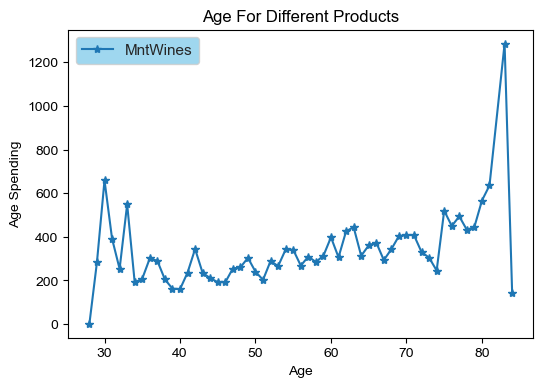

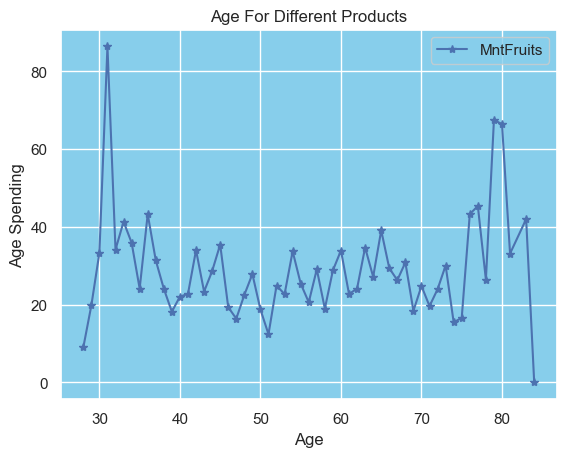

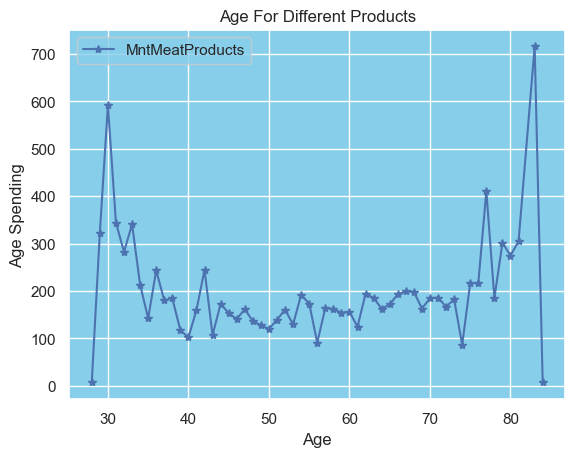

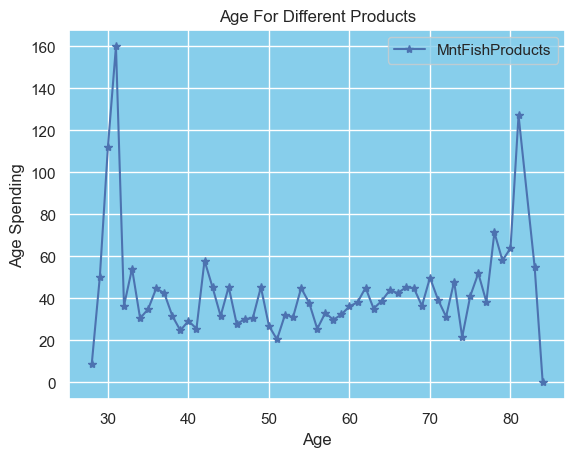

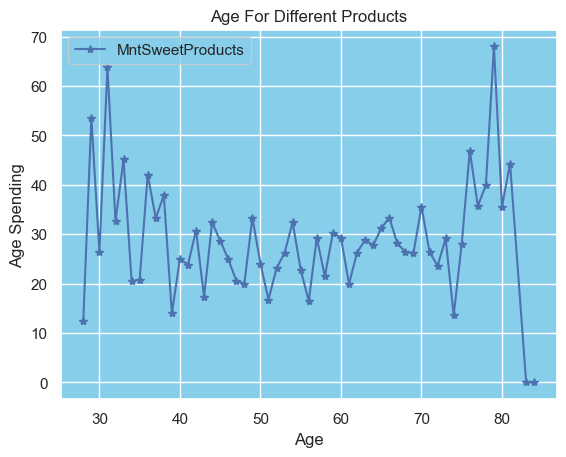

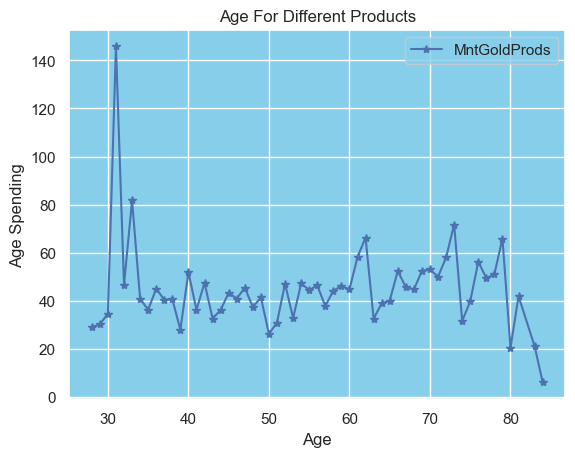

In [29]:
plt.figure(figsize=(6, 4)) 
for column in Prod_amt.columns:
    plt.plot(Prod_amt.index, Prod_amt[column], marker='*', label=column)
    sns.set(rc={'axes.facecolor': 'skyblue', 'axes.grid': True})
    plt.xlabel('Age')
    plt.ylabel('Age Spending')
    plt.title('Age For Different Products') 
    plt.legend()
    plt.show()

In [30]:
marital_counts = df['Marital_Status'].value_counts().sort_values(ascending=False)

In [31]:
marital_counts

Marital_Status
3    864
5    579
4    479
2    231
6     77
1      3
0      2
7      2
Name: count, dtype: int64

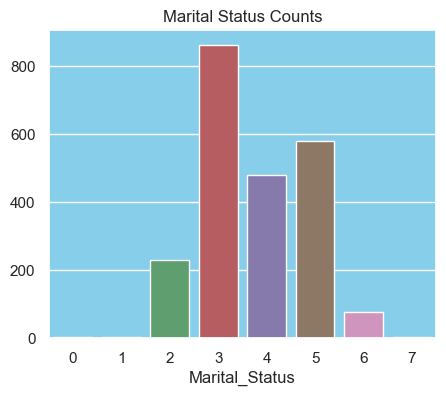

In [32]:
plt.figure(figsize=(5, 4))  
sns.barplot(x=marital_counts.index, y=marital_counts.values)
plt.title('Marital Status Counts')  
plt.show()

In [33]:
X = data.drop(columns=['Response'])

In [34]:
X = pd.get_dummies(X)

# Machine Learning Model

In [35]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [37]:
k = 5
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
kmeans.fit(X_scaled)
clusters = kmeans.predict(X_scaled)
data['Cluster'] = clusters
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

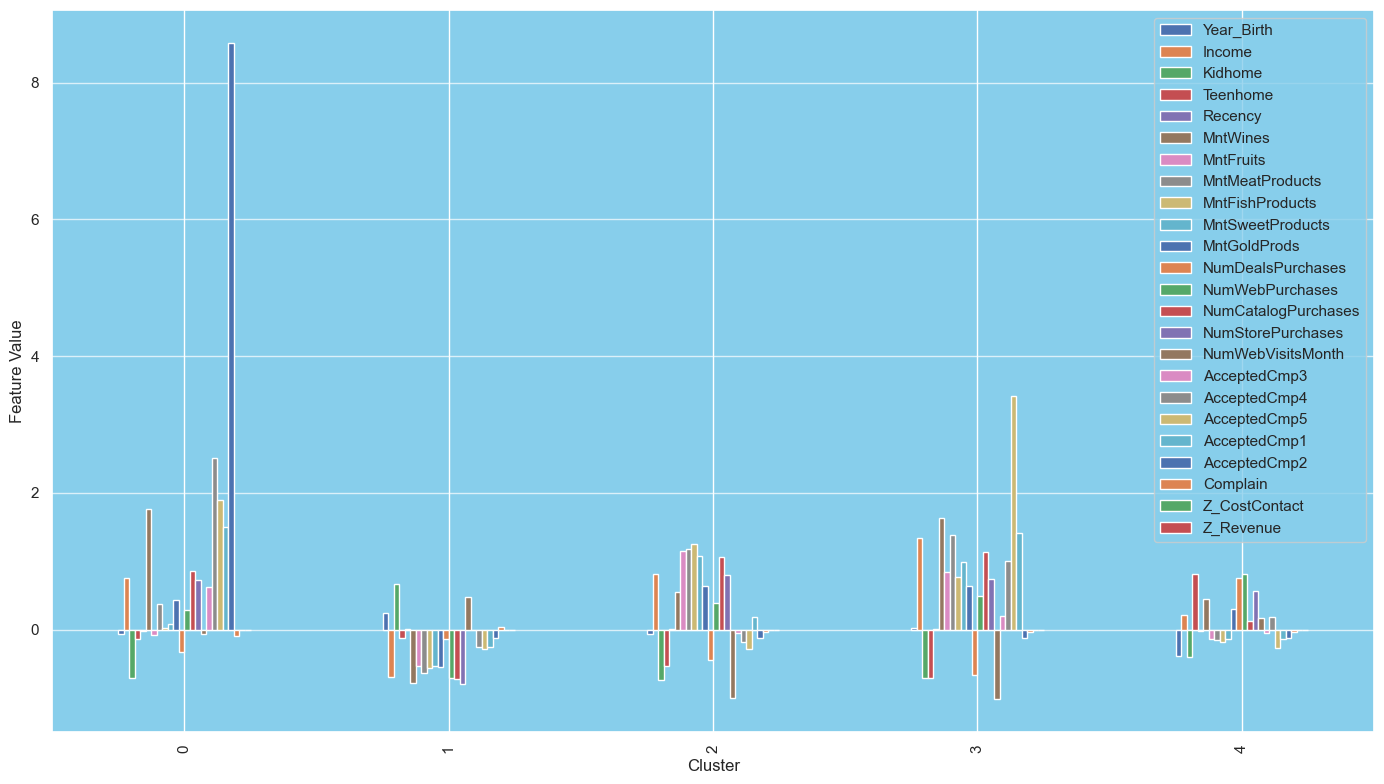

In [38]:
cluster_centers.plot(kind='bar', figsize=(14, 8))
plt.ylabel('Feature Value')
plt.xlabel('Cluster')
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()